<a href="https://colab.research.google.com/github/roneshpra/PythonLearning/blob/Dev/PythonBasics/M1W5_Project_Foodhub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 18.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.1

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load the data
orders = pd.read_csv("/content/drive/MyDrive/foodhub_order.csv")

In [5]:
# Creating a copy of the data
data = orders.copy()

In [6]:
# Write your code here to view the first 5 rows
data.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
# get the dimensions of the dataset
data.shape

(1898, 9)

#### Observations:
                  

*   The data has 1898 rows and 9 columns




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# get the data types for each columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   There are 5 variables with numeric values out of which one is of the type float.
*   There are 4 variables of type object
*   There are no columns with null values




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# check for null values in the data
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:

*   There are no columns with missing values




In [10]:
# Checking for duplicate values
data.duplicated().sum()

np.int64(0)

#### Observations:


*   There are no duplicate values in the dataset



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
# get the statistical data for the numeric variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:

*   The minimum time taken for the food to be prepared once an order has been placed is 20 minutes
*   The average time taken for the food to be prepared once an order has been placed is around 27 minutes
*   The maximum time taken for the food to be prepared once an order has been placed is around 35 minutes




### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
# get the counts for each type of rating
data['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [13]:
# print the number of orders that are not rated
print("The number of orders that are not rated is", data['rating'].value_counts()['Not given'])

The number of orders that are not rated is 736


#### Observations:

*   736 orders are not rated




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

####  Order ID

In [14]:
data['order_id'].nunique()

1898

#### Observations:


*   There are no missing values for order id.
*   There are no duplicate values for order id.



#### Customer ID

In [15]:
data['customer_id'].nunique()

1200

#### Observations:


*   There are 1200 unique values for customers
*   There are customers who have ordered more than once



#### Restaurant Name

In [16]:
data['restaurant_name'].nunique()

178

#### Observations:


*   There are 178 unique restaurants




#### Cuisine Type

In [17]:
data['cuisine_type'].nunique()


14

In [18]:
data['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

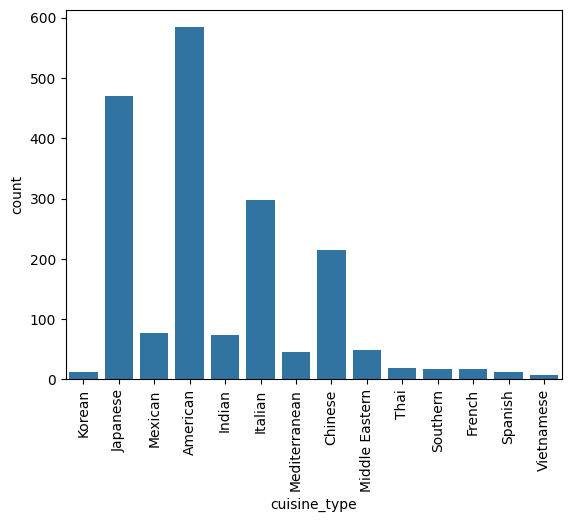

In [19]:
sns.countplot(data= data, x = 'cuisine_type');
plt.xticks(rotation = 90);
plt.show()

#### Observations:

*  There are 14 different types of cuisine
*  American, Japanese, Italian, Chinese are among the popular cuisines

#### Cost of the Order

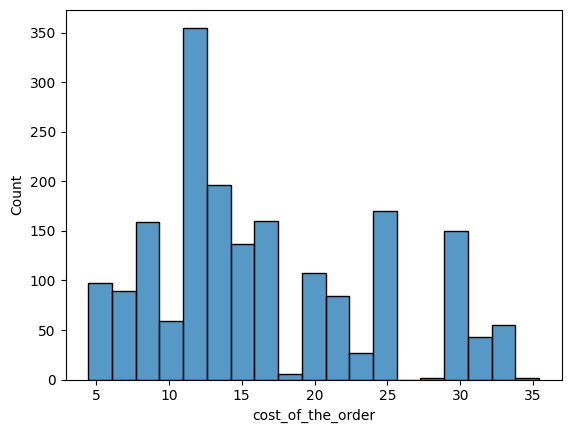

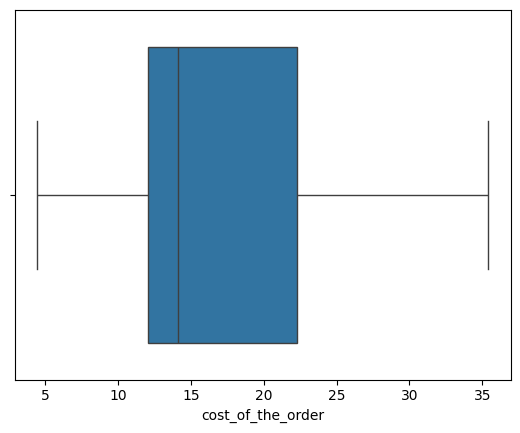

In [20]:
sns.histplot(data= data, x = 'cost_of_the_order');
plt.show()

sns.boxplot(data= data, x = 'cost_of_the_order');
plt.show()

#### Observations:


*   The median cost of the order is around $14



#### Day of the Week

In [21]:
data['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

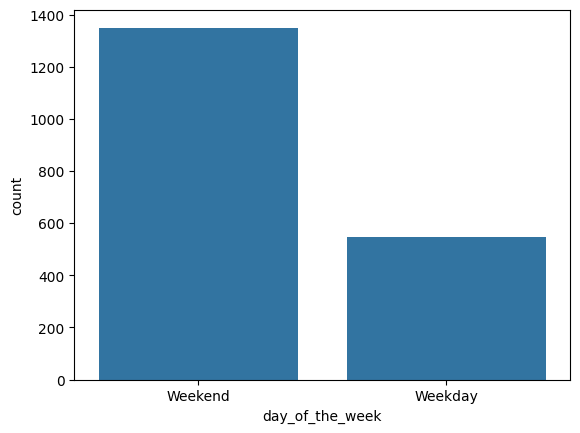

In [22]:
sns.countplot(data= data, x = 'day_of_the_week');
plt.show()

#### Observations:


*   There are 2 values for the days of the week
*   Monday through Friday is Weekday
*   Saturday and Sunday is Weekend
*   Most of the orders have been during weekends



#### Rating

In [23]:
data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

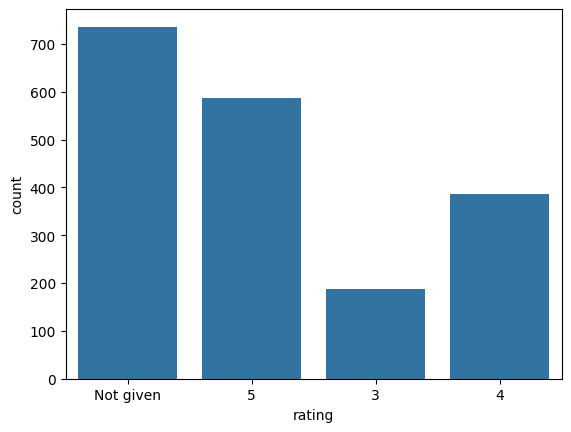

In [24]:
sns.countplot(data= data, x = 'rating');
plt.show()

#### Observations:


*   There are 4 unique values for ratings
*   Most of the orders have not been rated



#### Food Preparation Time

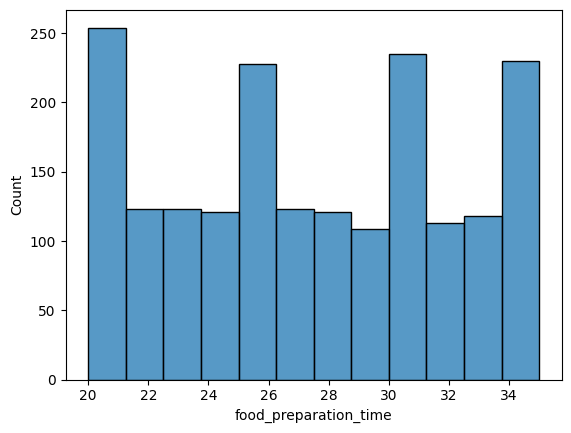

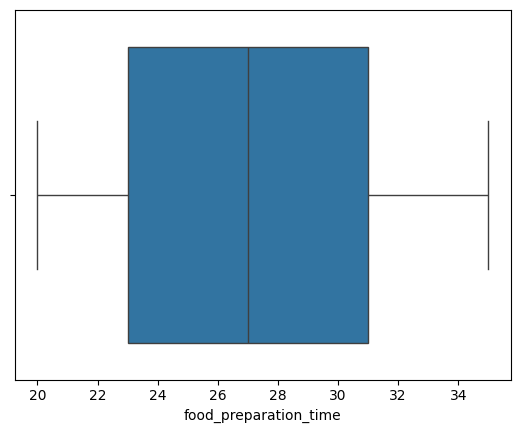

In [25]:
sns.histplot(data= data, x = 'food_preparation_time');
plt.show()

sns.boxplot(data= data, x = 'food_preparation_time');
plt.show()

#### Observations:


*   The median food preparation time is around 27 minutes
*   Less than 25% of the orders have the preparation time of around 23 minutes



#### Delivery Time

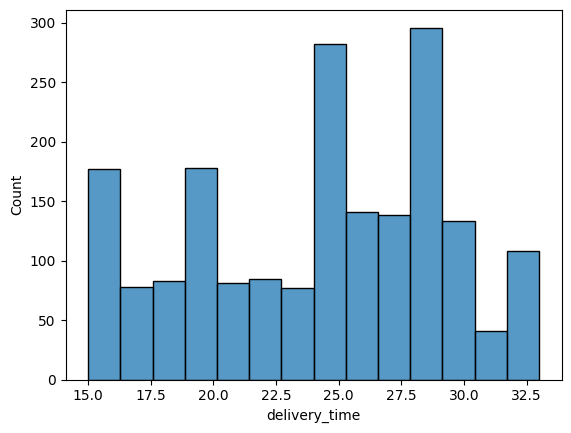

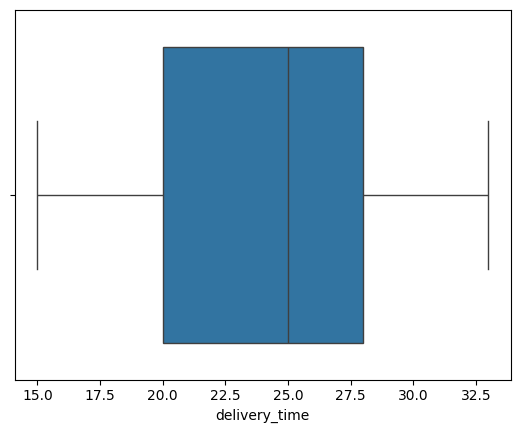

In [26]:
sns.histplot(data= data, x = 'delivery_time');
plt.show()

sns.boxplot(data= data, x = 'delivery_time');
plt.show()

#### Observations:


*   The median delivery time is around 25 minutes



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [27]:
# list the top 5 restaurants with the most number of orders
data['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

*   The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [28]:
# get the most popular cuisine during the weekrnds
popular_cuisine_wkend = data[data['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()

# list the top 5 cuisines during weekends
print(popular_cuisine_wkend.head())

# print the most popular cuisine during weekend
print("\nThe most popular cuisine on weekends is", popular_cuisine_wkend.index[0])

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64

The most popular cuisine on weekends is American


#### Observations:

*   The most popular cuisine during weekends is American cuisine
*   The other popular cuisines during weekend are Japanese, Italian, Chinese, Mexican




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [29]:
# get the orders that cost more than $20
orders_greater_than_20 = data[data['cost_of_the_order'] > 20]

# print the count of orders that are more than $20
print("The number of orders that cost more than $20 is", orders_greater_than_20.shape[0])

# calculate the percentage of orders that are greater than $20
percentage = (orders_greater_than_20.shape[0] / data.shape[0]) * 100

# print the percentage of orders greater than $20
print("The percentage of orders that cost more than $20 is ", round(percentage, 2), "%", sep='')

The number of orders that cost more than $20 is 555
The percentage of orders that cost more than $20 is 29.24%


#### Observations:

*   29.24% of the orders cost more than $20

*   Out of the total orders, 555 orders cost more than $20






### **Question 10**: What is the mean order delivery time? [1 mark]

In [30]:
# get the mean order delivery time
mean_delivery_time = data['delivery_time'].mean()

print("The mean order delivery time is", round(mean_delivery_time, 2), "minutes")

The mean order delivery time is 24.16 minutes


#### Observations:

*   The mean delivery time for the orders is 24.16 minutes




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [31]:
# get the top 3 customer ids and the count of their order
top_3_customers = data['customer_id'].value_counts().head(3)
top_3_customers

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:

*   Customer with id 52832 is the most frequent customer with 13 orders followed by customer with id 47440, 10 orders and customer with id 83287 with 9 orders




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


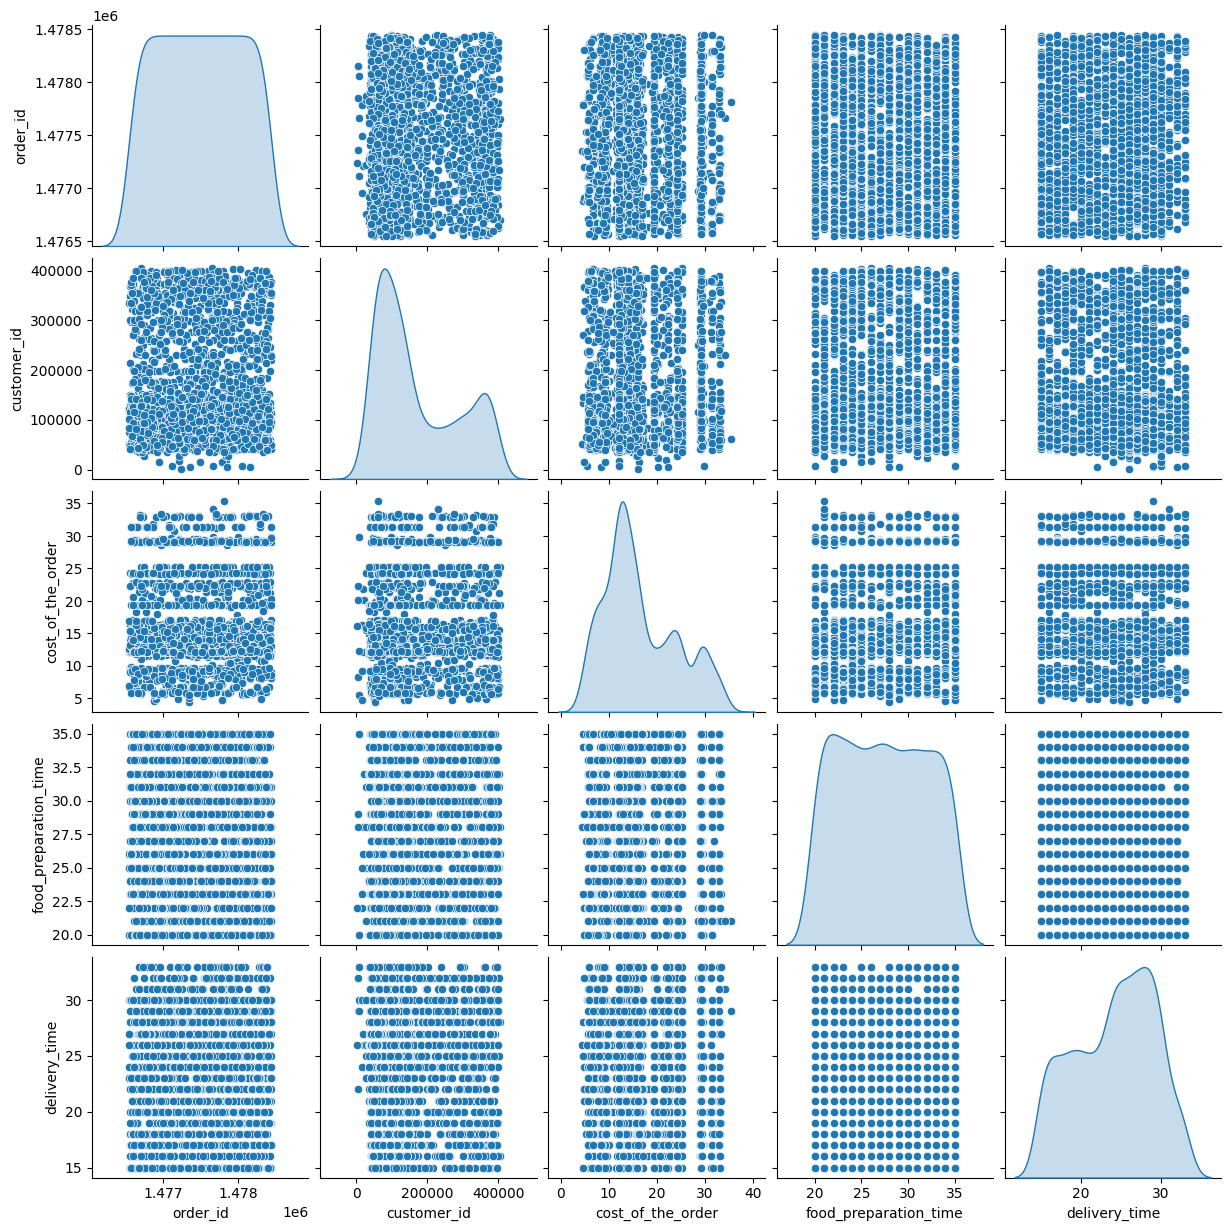

In [32]:
# pair plots for all the variables in the data set
sns.pairplot(data= data, diag_kind="kde");
plt.show()


#### Relation between Cuisine Type and Food Preparation Time

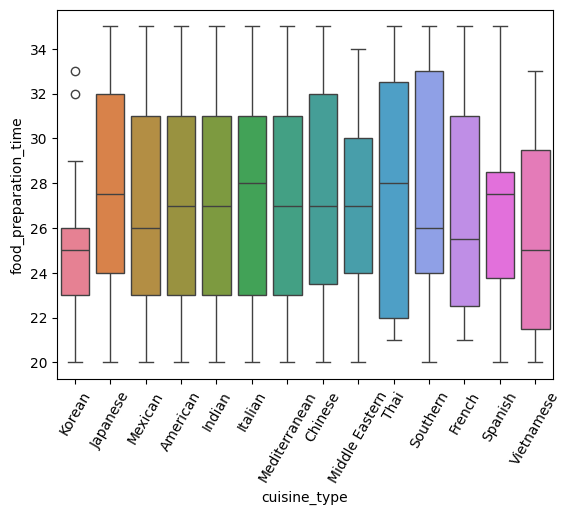

In [33]:
# Relation between Cuisine type and Food preparation time

sns.boxplot(data = data, x = "cuisine_type", y = "food_preparation_time", hue = "cuisine_type");
plt.xticks(rotation = 60);
plt.show()

#### Observations:


*   The median preparation time for all the cuisines have been between 25 minutes and 29 minutes



#### Relation between Day of the Week and Delivery Time

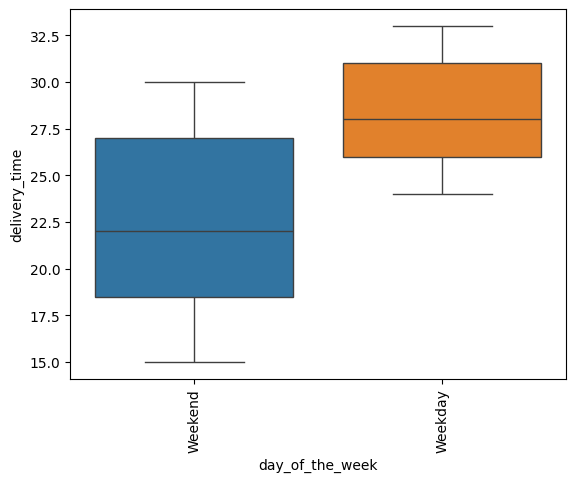

In [34]:
# Relation between Day of the week and Food Delivery time

sns.boxplot(data =  data, x = "day_of_the_week", y = "delivery_time", hue = "day_of_the_week");
plt.xticks(rotation = 90);

#### Observations:

*   The delivery time during weekends have been faster than the weekdays




#### Relation between Rating and Cuisine Type

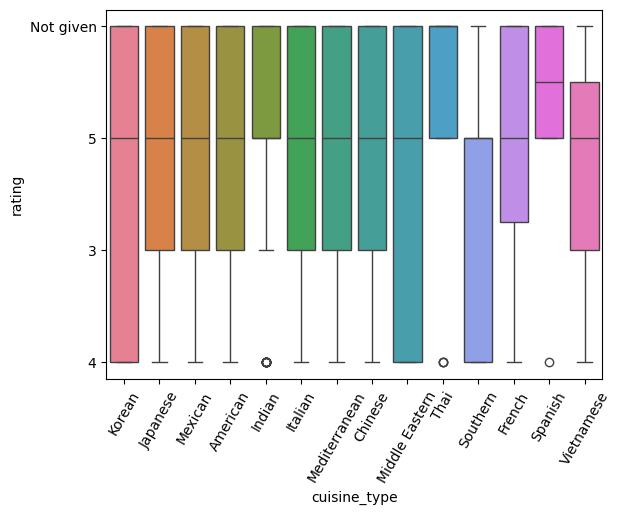

In [53]:
# Relation between Rating and Cuisine Type

sns.boxplot(data = data, x = "cuisine_type", y = "rating", hue = "cuisine_type");
plt.xticks(rotation = 60);
plt.show()

#### Observations:

*   Median rating for most of the cuisine type is 5



#### Relation between Rating and Delivery Time

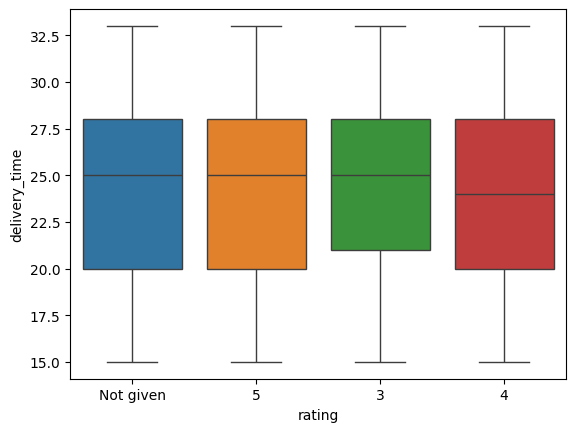

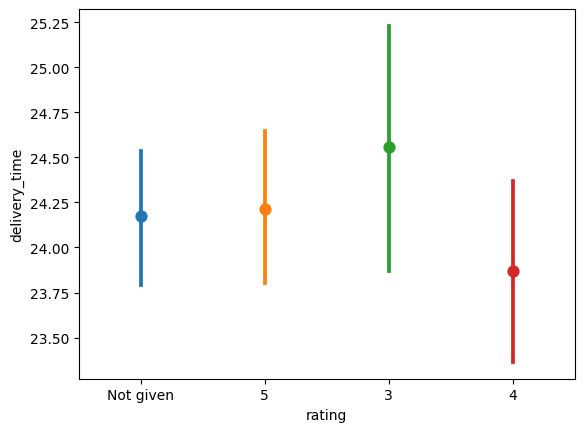

In [36]:
# Relation between Rating and Delivery time

sns.boxplot(data = data, x = "rating", y = "delivery_time", hue = "rating");
plt.show()

sns.pointplot(data = data, x = "rating", y = "delivery_time", hue = "rating");
plt.show()

#### Observations:

*   There is no significant relation between Rating and the Delivery Time



#### Relation between Rating and Food Preparation Time

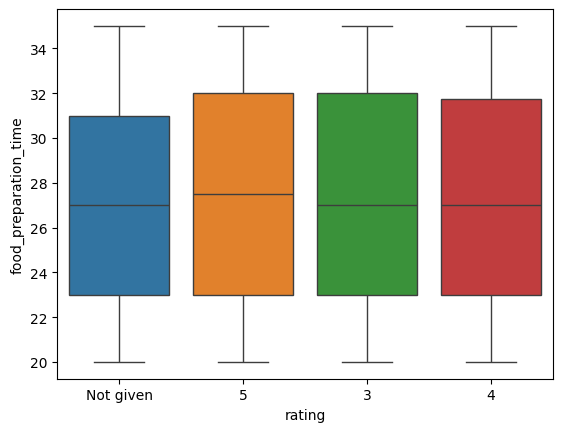

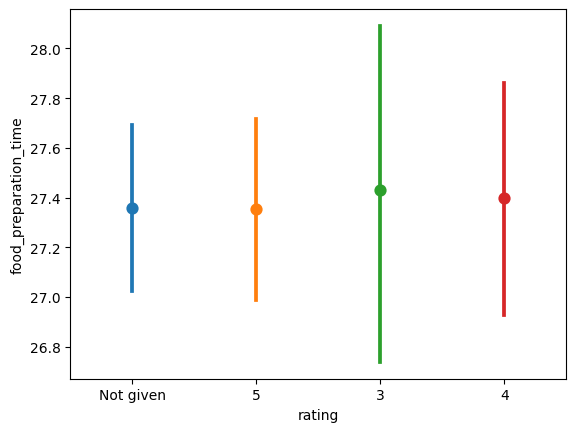

In [37]:
# Relation between Rating and Food Preparation Time

sns.boxplot(data = data, x = "rating", y = "food_preparation_time", hue = "rating");
plt.show()

sns.pointplot(data = data, x = "rating", y = "food_preparation_time", hue = "rating");
plt.show()

#### Observations:

*   Most of the Ratings are centered between 27.3 and 27.5 minutes of Food Preparation Time



#### Relation between Rating and Cost of the Order

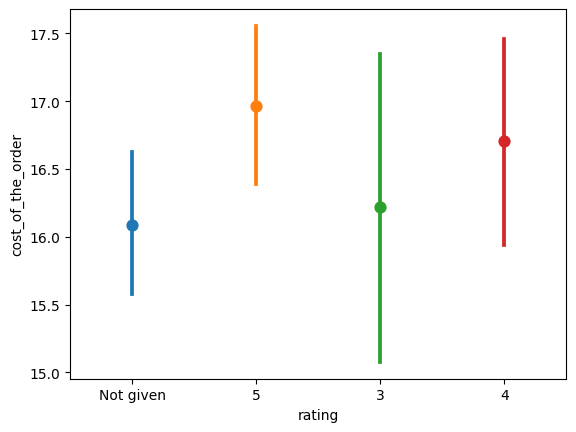

In [38]:
# Relation between Rating and Cost of Order

sns.pointplot(data = data, x = "rating", y = "cost_of_the_order", hue = "rating");
plt.show()

#### Observations:

*   The ratings are centered between 16 and 17 dollars cost of order



#### Correlation of Numeric Variables

In [39]:
# Heatmap for correlation between numeric variables

num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

corr_num = data[num_var].corr()
corr_num

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


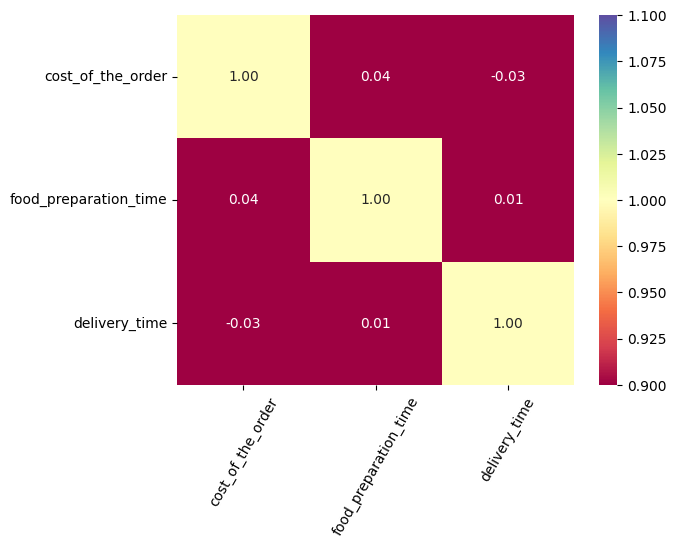

In [40]:
sns.heatmap(corr_num, annot = True, vmin=1, vmax=1, fmt=".2f", cmap="Spectral");
plt.xticks(rotation = 60);
plt.show()

#### Observations:

*   There is no significant correlation between Cost of the Order, Food Preparation Time and Delivery Time



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [41]:
# Get the list of restaurants that are rated
# create a copy of data so the original data is not changed

data_rated = data[data['rating'] != 'Not given'].copy()

# convert the rating column datatype from object to int
data_rated['rating'] = data_rated['rating'].astype('int')
data_rated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


In [42]:
# Create a dataframe with restaurant names with their ratings
data_restaurants_ratings = data_rated.groupby(['restaurant_name'])['rating']

# get the count of ratings for the restaurants
data_restaurants_ratings = data_restaurants_ratings.count().sort_values(ascending=False).reset_index()

In [43]:
# Get the restaurants that have rating counts of more than 50
rest_ratingscount_50 = data_restaurants_ratings[data_restaurants_ratings['rating'] > 50]['restaurant_name']

# get the data for the restaurants having the rating count more than 50
data_rest_ratingcount_50 = data_rated[data_rated['restaurant_name'].isin(rest_ratingscount_50)].copy()

# get the mean ratings for each restaurants that have the rating count of more than 50
data_rest_mean = data_rest_ratingcount_50.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()

# filter the restaurants that have an average rating of more than 4
data_avg_rating_greater_than_4 = data_rest_mean[data_rest_mean['rating'] > 4]

# display the restaurants that have the more than 50 ratings and the average rating more than 4
data_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

*   There are only 4 restaurants that meets the criteria for the promotional offer out of 178 restaurants.




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [44]:
# create a function to calculate the revenue charged for each order
def revenue(cost):
  if cost > 20:
    return cost * 0.25
  elif cost > 5:
    return cost * 0.15
  else:
    return 0

# Add a column to the data called revenue based on the cost of the order and apply the above function
data['revenue'] = data['cost_of_the_order'].apply(revenue)

# Display the data
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [45]:
# get the net revenue collected by the company
net_revenue = data['revenue'].sum()

# display the net revenue
print("The net revenue for the company across all orders is $", round(net_revenue,2), sep='')

The net revenue for the company across all orders is $6166.3


#### Observations:

*   The net revenue for the company is $6166.3




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [46]:
# add a column for total time taken for an order from the time the order is placed
data['total_time'] = data['delivery_time'] + data['food_preparation_time']

# display the top 5 rows of the data with the total_time column
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [47]:
# get the orders that have a total delivery time of more than 60 minutes

orders_greater_than_1hr = data[data['total_time'] > 60]
orders_greater_than_1hr.shape

(200, 11)

In [48]:
# percentage of orders that take more than 60 minutes to deliver

percentage = orders_greater_than_1hr.shape[0] / data.shape[0] * 100

# print the percentage of orders that take more than 60 minutes

print("The percentage of orders that take more than 60 minutes to deliver is ", round(percentage, 2), "%", sep='')

The percentage of orders that take more than 60 minutes to deliver is 10.54%


#### Observations:

*   Only 10.54% of the orders take more than 1 hour to deliver after the order have been placed




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [49]:
# get the mean delivery time for orders on weekday
mean_delivery_time_weekday = data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# print the mean delivery time on weekday
print("The mean delivery time on weekday is", round(mean_delivery_time_weekday, 2), "minutes")

The mean delivery time on weekday is 28.34 minutes


In [50]:
# get the mean delivery time for orders on weekend
mean_delivery_time_weekend = data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# print the mean delivery time on weekend
print("The mean delivery time on weekend is", round(mean_delivery_time_weekend, 2), "minutes")

The mean delivery time on weekend is 22.47 minutes


In [51]:
data.groupby(['day_of_the_week'])['order_id'].count()

,order_id
day_of_the_week,
Weekday,547
Weekend,1351


#### Observations:

*   The mean delivery time for weekends is 22.47 minutes
*   The mean delivery time for weekdays is 28.34 minutes
*   The mean delivery time on weekdays are more than the weekends though the number of orders on weekends are more than double than on weekdays




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
    
*   The cost of the order, delivery time and food preparation time does not have much effect on the rating.
*   There are 736 orders that are not rated out of 1898 orders which is a big number
*   There are 1200 unique customers, however, only 416 have ordered more than once
*   There are 14 cuisine type that is available to order. The American cuisine is the most popular one.
*   The number of orders are more during the weekend than during the weekdays



### Recommendations:

*    The number of orders during the weekend is higher than the weekdays. The food preparation time and delivery time should be maintained or improved to keep the high volumes of order during weekends.
*    To increase the volumes during weekdays, a discount program can be started to attract customers to order during weekdays.
*    The customers should be motivated to rate the order to improve the customer service.
*    The American cuisine is the most popular cuisine type followed by Japanese, Italian, chinese. we should maintain the services for these cuisine types.
*    The Mexican and Indian cuisine type have the potential for growth.
*    Should have a credit or discount program for customers who uses the app to order repeatedly.

#### Further Analysis that can be done



1.   Dig deeper to explore the order volumes during weekdays and find ways to increase the volume
2.   Find ways to motivate customers to rate



---